In [1]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
import pandas as pd

In [2]:
def import_data(filename):
    df = pd.read_excel(filename)
    df['county'] = df.County.str.extract(r'(^\w+.\w+)')
    df = df.fillna(0)
    return df

In [5]:
def create_species_groups(df):
    df['groups'] = np.where((df.Incognita > 0)&(df.Arenaria == 0)&(df.Javanica == 0), 'Mi',
                   np.where((df.Incognita == 0)&(df.Arenaria > 0)&(df.Javanica == 0), 'Ma',
                   np.where((df.Incognita == 0)&(df.Arenaria == 0)&(df.Javanica > 0), 'Mj',

                   np.where((df.Incognita > 0)&(df.Arenaria > 0)&(df.Javanica == 0), 'MiMa',
                   np.where((df.Incognita > 0)&(df.Arenaria == 0)&(df.Javanica > 0), 'MiMj',
                   np.where((df.Incognita == 0)&(df.Arenaria > 0)&(df.Javanica > 0), 'MaMj',
                            
                   np.where((df.Incognita > 0)&(df.Arenaria > 0)&(df.Javanica > 0), 'MiMaMj',
                    'none')))))))
    return df

In [15]:
df = import_data('FOR_CHART.xlsx')
df = create_species_groups(df)
df.groupby('groups').count().Sample_code

groups
Ma         6
MaMj       1
Mi        91
MiMa      10
MiMaMj     1
MiMj       1
Mj         1
Name: Sample_code, dtype: int64

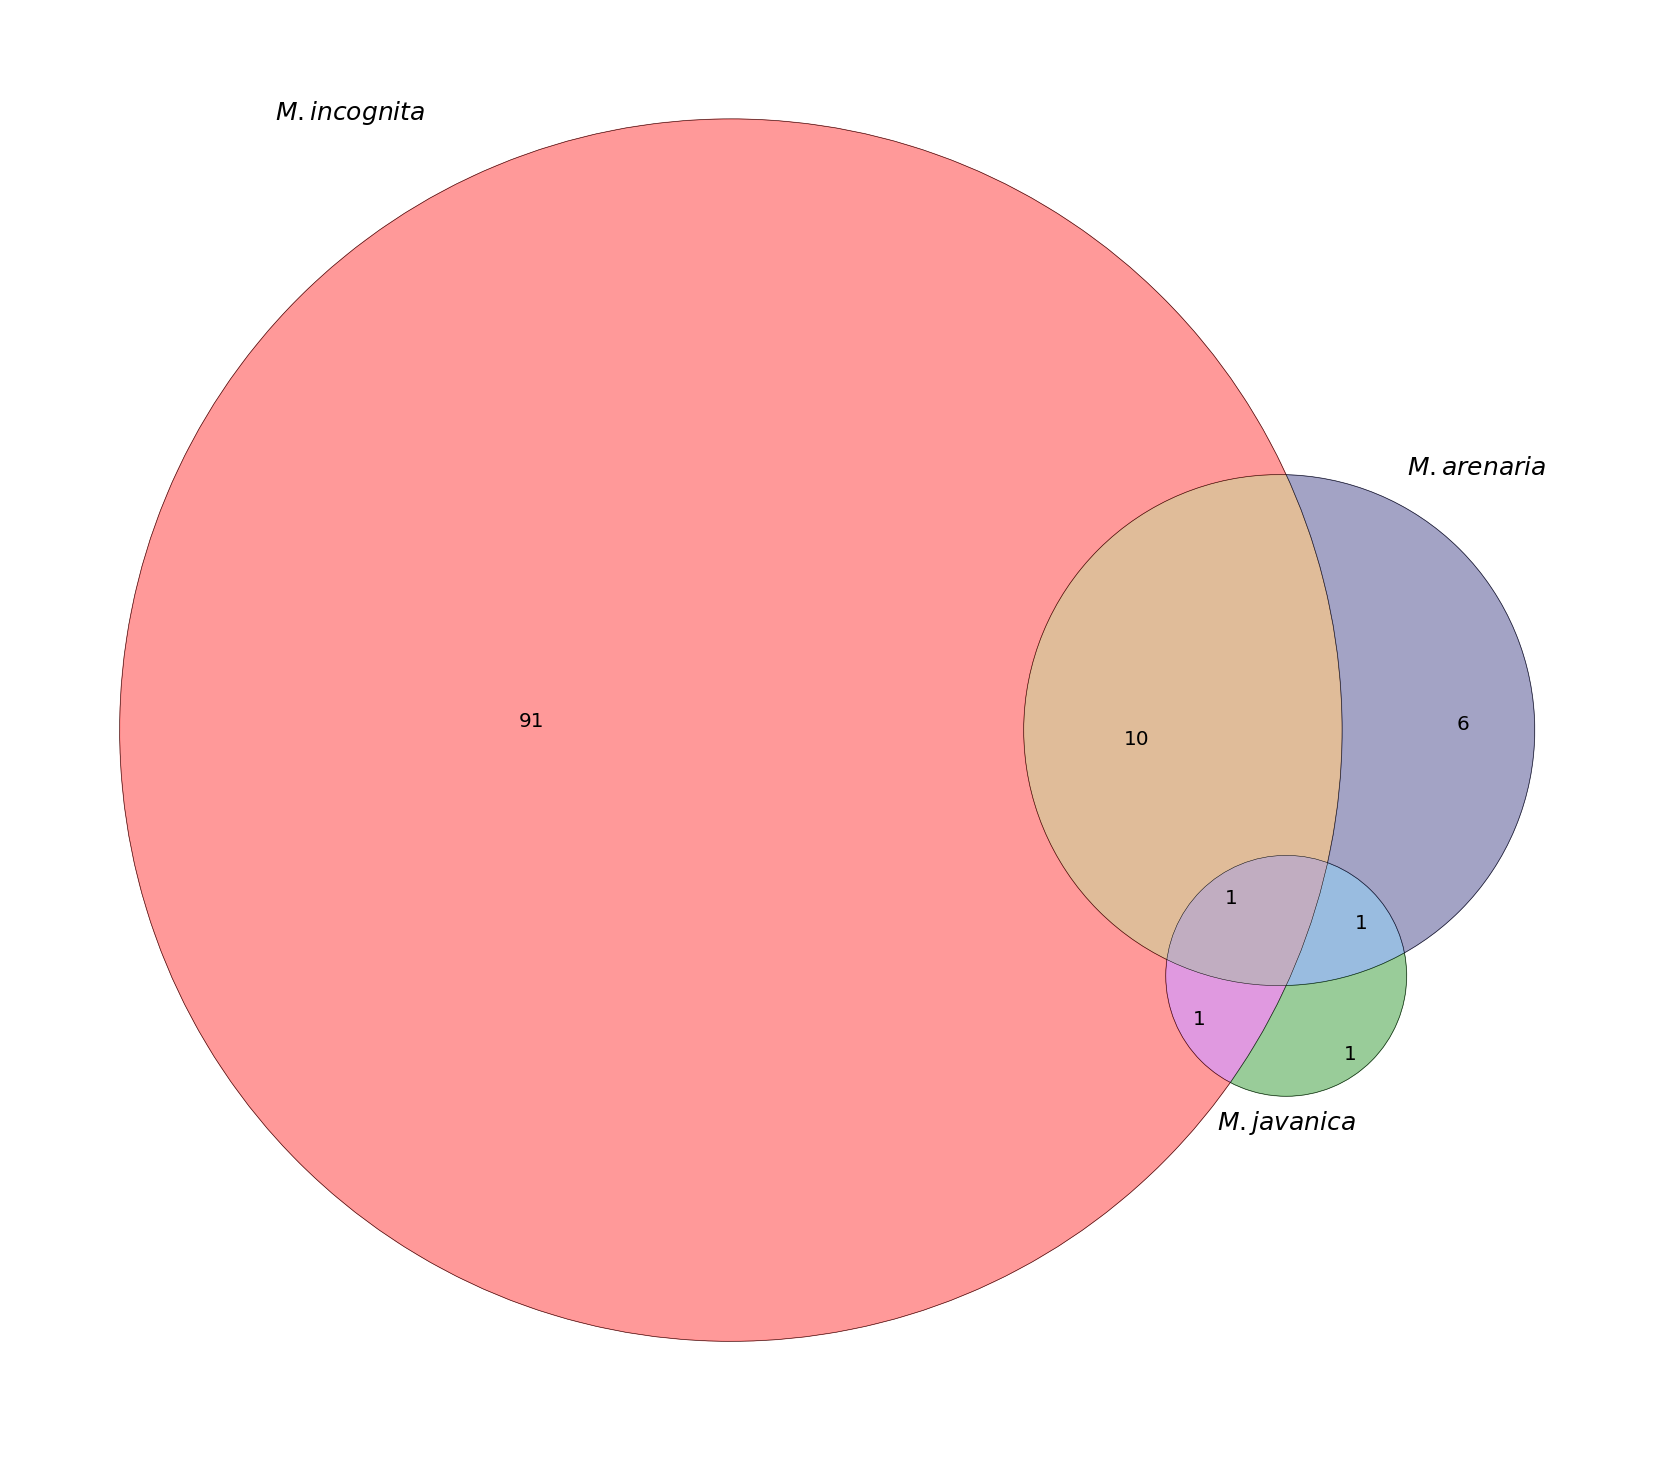

In [76]:
Ma = 6
MaMj     =  1
Mi      =  91
MiMa    =  10
MiMaMj   =  1
MiMj     =  1
Mj = 1
figure, axes = plt.subplots(figsize=(20, 20))
out = venn3(subsets = (Mi, Ma, MiMa, Mj, MiMj, MaMj, MiMaMj), set_labels = ('$M. incognita$' , '$M. arenaria$' , '$M. javanica$'));
out.get_patch_by_id('100').set_color('red')
out.get_patch_by_id('010').set_color('midnightblue')
out.get_patch_by_id('001').set_color('green')
# out.get_patch_by_id('111').set_color('magenta')
for text in out.set_labels:
    text.set_fontsize(25)
for text in out.subset_labels:
    text.set_fontsize(20)
c = venn3_circles(subsets = (Mi, Ma, MiMa, Mj, MiMj, MaMj, MiMaMj), linestyle='solid', linewidth=0.5)
plt.tight_layout(pad=-10)
plt.savefig('species_group_venn.svg',dpi=1080)
#https://www.geeksforgeeks.org/matplotlib-colors-to_rgba-in-python/

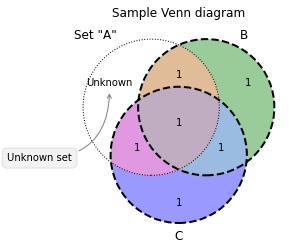

In [2]:
plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'))

v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('white')
v.get_label_by_id('100').set_text('Unknown')
v.get_label_by_id('A').set_text('Set "A"')

c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='dashed')

c[0].set_lw(1.0)
c[0].set_ls('dotted')
plt.title("Sample Venn diagram")

plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.show()